In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
# Import dataset
raw = pd.read_csv('car_data_clean.csv')


In [16]:
df = raw.copy()

In [17]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,years_old,price_diff,devaluation_ratio,km_per_year,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,9,-2.24,-0.248889,3000.000000,1,0,1
1,sx4,2013,4.75,9.54,43000,0,10,-4.79,-0.479000,4300.000000,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,6,-2.60,-0.433333,1150.000000,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,12,-1.30,-0.108333,433.333333,1,0,1
4,swift,2014,4.60,6.87,42450,0,9,-2.27,-0.252222,4716.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,city,2016,9.50,11.60,33988,0,7,-2.10,-0.300000,4855.428571,0,0,1
280,brio,2015,4.00,5.90,60000,0,8,-1.90,-0.237500,7500.000000,1,0,1
281,city,2009,3.35,11.00,87934,0,14,-7.65,-0.546429,6281.000000,1,0,1
282,city,2017,11.50,12.50,9000,0,6,-1.00,-0.166667,1500.000000,0,0,1


In [18]:
# Drop price_diff column because it is not available for new data
df.drop(['price_diff','Car_Name', 'Year'], axis=1, inplace=True)


In [19]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,years_old,devaluation_ratio,km_per_year,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,-0.248889,3000.000000,1,0,1
1,4.75,9.54,43000,0,10,-0.479000,4300.000000,0,0,1
2,7.25,9.85,6900,0,6,-0.433333,1150.000000,1,0,1
3,2.85,4.15,5200,0,12,-0.108333,433.333333,1,0,1
4,4.60,6.87,42450,0,9,-0.252222,4716.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...
279,9.50,11.60,33988,0,7,-0.300000,4855.428571,0,0,1
280,4.00,5.90,60000,0,8,-0.237500,7500.000000,1,0,1
281,3.35,11.00,87934,0,14,-0.546429,6281.000000,1,0,1
282,11.50,12.50,9000,0,6,-0.166667,1500.000000,0,0,1


In [20]:
# Normalize the data 

# Divide into X and y
X = df[["Present_Price", "years_old", "devaluation_ratio"]]
y = df['Selling_Price']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Save the scaler
import joblib
joblib.dump(sc, 'scaler.pkl')





['scaler.pkl']

In [21]:
# Do a uni variate linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Check the accuracy of the model for train and test data
print('Train Accuracy: ', regressor.score(X_train, y_train))
print('Test Accuracy: ', regressor.score(X_test, y_test))





Train Accuracy:  0.9750782377322991
Test Accuracy:  0.9860584446474139


Feature: 0, Score: 5.81052
Feature: 1, Score: -0.62559
Feature: 2, Score: 2.48884


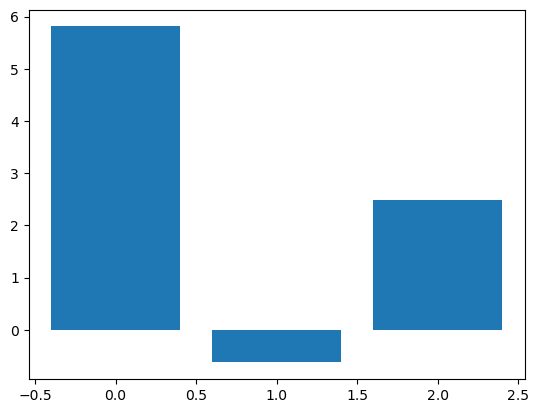

In [22]:
# Get feature importance
importance = regressor.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

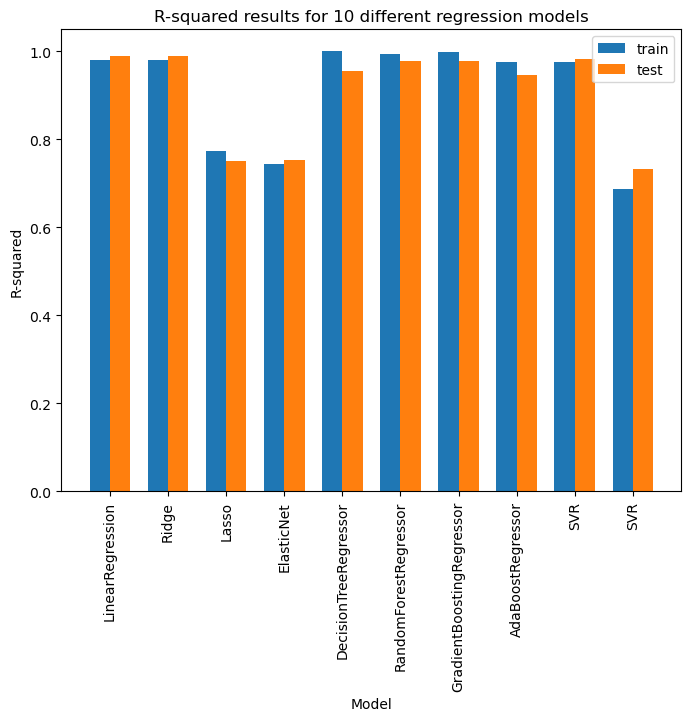

In [31]:
# Normalize the data 

# Divide into X and y
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Define a list of regressor models to test
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), 
          DecisionTreeRegressor(), RandomForestRegressor(), 
          GradientBoostingRegressor(), AdaBoostRegressor(),
          SVR(kernel='linear'), SVR(kernel='rbf')]

# Define empty lists to store R-squared results for train and test data
r2_train = []
r2_test = []

# Loop over each model, fit it to the data, and calculate R-squared for both train and test data
for model in models:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    r2_train.append(r2_score(y_train, y_pred_train))
    r2_test.append(r2_score(y_test, y_pred_test))

# Define x-axis and width of the bars
x = np.arange(len(models))
width = 0.35

# Plot the R-squared results for train and test data using a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, r2_train, width, label='train')
rects2 = ax.bar(x + width/2, r2_test, width, label='test')
ax.set_xticks(x)
ax.set_xticklabels([type(model).__name__ for model in models], rotation=90)
ax.legend()
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
ax.set_title('R-squared results for 10 different regression models')
plt.show()




Train Accuracy:  0.9917835840876572
Test Accuracy:  0.9663164291732531
Feature: 0, Score: 0.88471
Feature: 1, Score: 0.00779
Feature: 2, Score: 0.00003
Feature: 3, Score: 0.06421
Feature: 4, Score: 0.02513
Feature: 5, Score: 0.00426
Feature: 6, Score: 0.00190
Feature: 7, Score: 0.00534
Feature: 8, Score: 0.00662


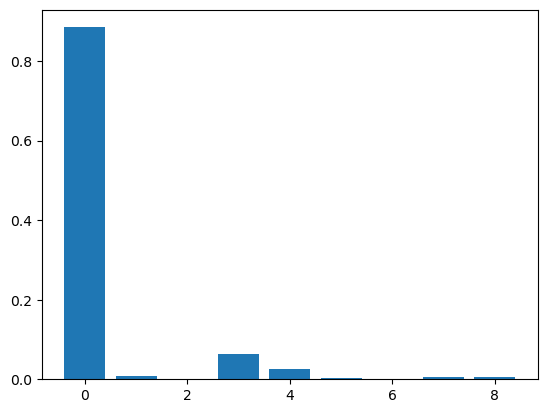

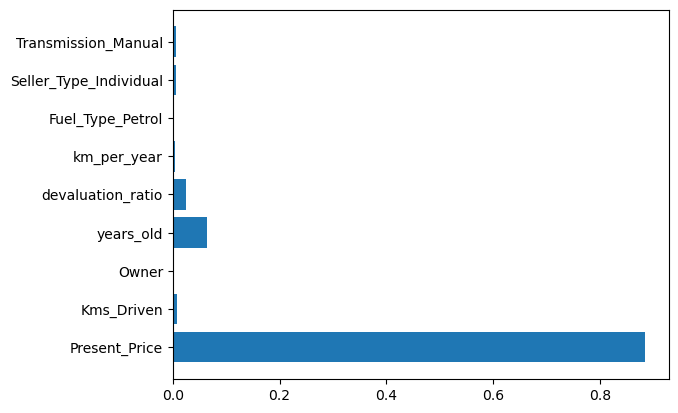

In [33]:
# Run a random forest regressor model and use regularization to reduce overfitting
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Check the accuracy of the model for train and test data
print('Train Accuracy: ', regressor.score(X_train, y_train))
print('Test Accuracy: ', regressor.score(X_test, y_test))

# Get feature importance
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


plt.barh([x for x in range(len(importance))], importance)
plt.yticks([x for x in range(len(importance))], X.columns)
plt.show()










In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Use only the most important features
X = df[['Present_Price', 'years_old', 'devaluation_ratio']]
y = df['Selling_Price']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# define your Random Forest classifier
rf = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=5
                                    , min_samples_split=5, min_samples_leaf=2)

# define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# define the GridSearchCV object with the classifier, parameter grid and other relevant parameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# print the best parameters and score found
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# use the best model to make predictions on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)


Best parameters:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score:  0.9635749352686404


In [28]:
# Use only the most important features
X = df[['Present_Price', 'years_old', 'devaluation_ratio']]
y = df['Selling_Price']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Run a random forest regressor model and use regularization to reduce overfitting
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth= 10, min_samples_leaf = 1, min_samples_split =2, n_estimators= 50)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Check the accuracy of the model for train and test data
print('Train Accuracy: ', regressor.score(X_train, y_train))
print('Test Accuracy: ', regressor.score(X_test, y_test))



Train Accuracy:  0.9930810861604381
Test Accuracy:  0.9760822819477262


In [29]:
# Save model to disk
import pickle
pickle.dump(regressor, open('model.pkl','wb'))